# Photothermal Radiometry 分析

### 引入所需要的packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import array
import math

# 讀取數據
### 1. 在跑labview讀資料的時候，數據點取n的二次方
### 像以下例子，我取的data點是100Hz,400Hz, 900Hz,....,102400Hz
### 2. 檔案命名記得要按照系統字母排序，這樣讀檔時才不會亂掉
### 100Hz檔名：0_1.txt / 12100Hz檔名：1_1.txt / 102400Hz檔名：3_2.txt
### 3. 不同樣品的數據放在不同資料夾

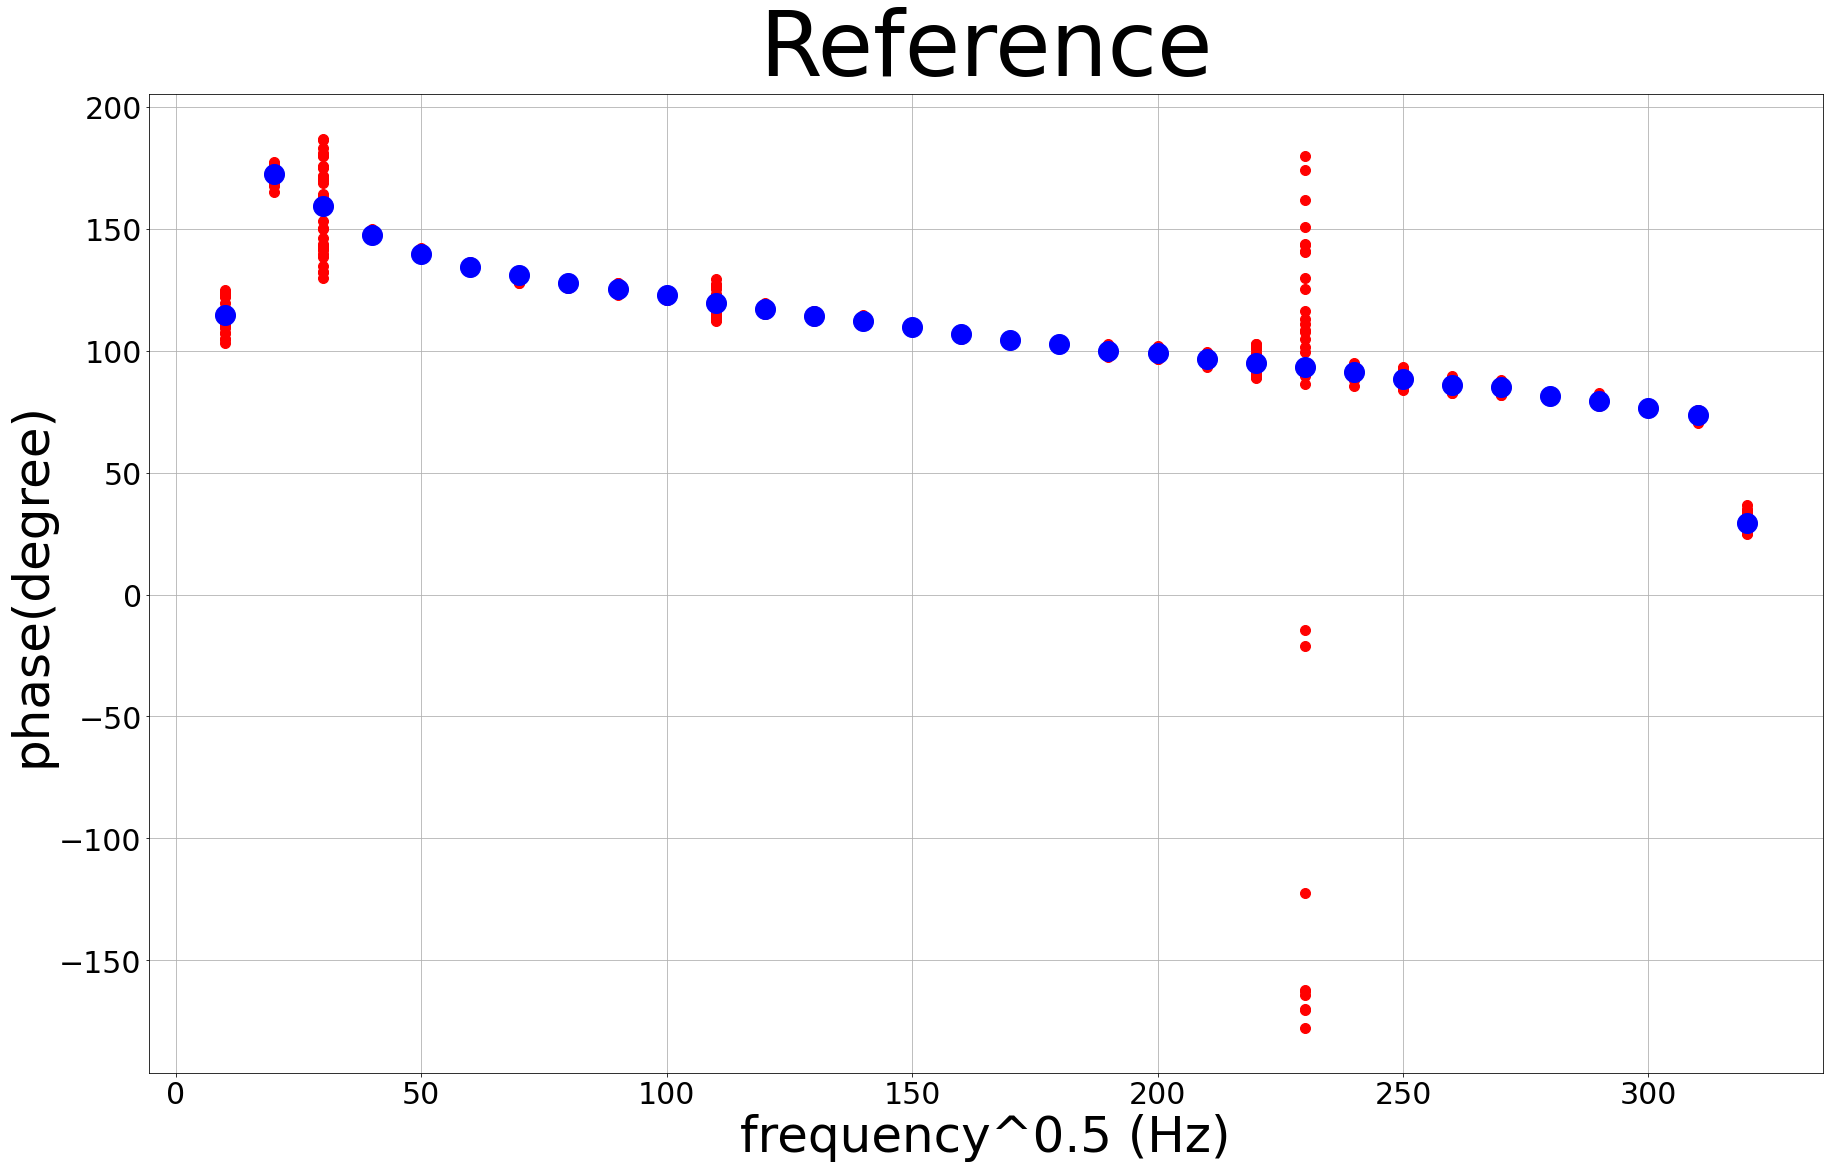

In [22]:
# 設定你那次實驗所有檔案存放的資料夾
# 這個檔案我放reference
Folder_Path = r'C:\Users\user\Documents\DATA14'
os.chdir(Folder_Path)                                                
file_list = os.listdir()
# file_num為DATA14這個資料夾有幾個檔案
file_num=32
# 宣告你資料存放的矩陣
# 存reference量測的頻率
ref_freq=np.zeros(file_num)
# 存reference量測的頻率(開根號)
ref_sqrt_freq=np.zeros(file_num)
# 跑迴圈ref_freq[0]=100,ref_freq[1]=400,...,ref_freq[32]=102400
for i in range(1,file_num+1):
    ref_freq[i-1]=(i*10)**2
#將所有頻率開根號以便繪圖
ref_sqrt_freq=ref_freq**0.5
# 設定繪圖圖案大小
plt.rcParams["figure.figsize"] = (30,18)
# 設定存放每個頻率相對應的相位和振幅
# 宣告相位矩陣
ref_pha_aver=np.zeros(file_num)
# 宣告振幅矩陣
ref_amp_aver=np.zeros(file_num)
# 開始跑回圈讀檔案
for i in range(0,file_num):
    # 開起檔案，這裡的file_list為Folder_Path路徑下的檔案順序
    df = open(Folder_Path+"\\"+file_list[i], "r")
    # 計算這個檔案有幾行
    n=len(df.readline())
    # 宣告矩陣暫時存放這個檔案的資料
    # 宣告暫時存放相位的矩陣
    ref_pha_temp=np.zeros(n)
    # 宣告暫時存放振幅的矩陣
    ref_amp_temp=np.zeros(n)
    # 宣告一個長度為n的矩陣，裡面每個的值都等於這個檔案所用的量測頻率(開根號)
    ref_sqrt_freq_temp=np.ones(n)*ref_sqrt_freq[i]
    j=0
    # 讀這個檔案的每一行
    for line in df:
        # 一行有三個資料，分別為時間、振幅、相位
        time,ref_amp_temp[j],ref_pha_temp[j]=line.split()
        # 因為有時候相位會超過180度跑到負的
        # 所以把這些跑掉的點加回360度
        if(i==2):
            if(ref_pha_temp[j]<0):
                ref_pha_temp[j]+=360
        j=j+1
        #讀到這個檔案的最後一筆資料就終止
        if(j==n):
            break
    # 把這個檔案讀到的所有相位取平均
    ref_pha_aver[i]=np.mean(ref_pha_temp)
    # 把這個檔案讀到的所有振幅取平均
    ref_amp_aver[i]=np.mean(ref_amp_temp)
    # 把這個檔案讀到的所有相位全部畫出來，標記為紅色
    plt.plot(ref_sqrt_freq_temp,ref_pha_temp,"ro",markersize=10)
# 因為儀器問題，有些頻率數據點會散掉，所以把前後兩個頻率的點取平均
ref_pha_aver[22]=0.5*(ref_pha_aver[21]+ref_pha_aver[23])
# 把所有檔案的平均相位全部畫出來，標記為藍色
plt.plot(ref_sqrt_freq,ref_pha_aver,"bo",markersize=20)
plt.xlabel('frequency^0.5 (Hz)',fontsize=50)
plt.ylabel('phase(degree)',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Reference",fontsize=90)
plt.grid()
plt.show()

### 必須確保reference和sample取樣的頻率都要一樣
### 像reference量過100Hz/400Hz/900Hz
### sample也要量100Hz/400Hz/900Hz

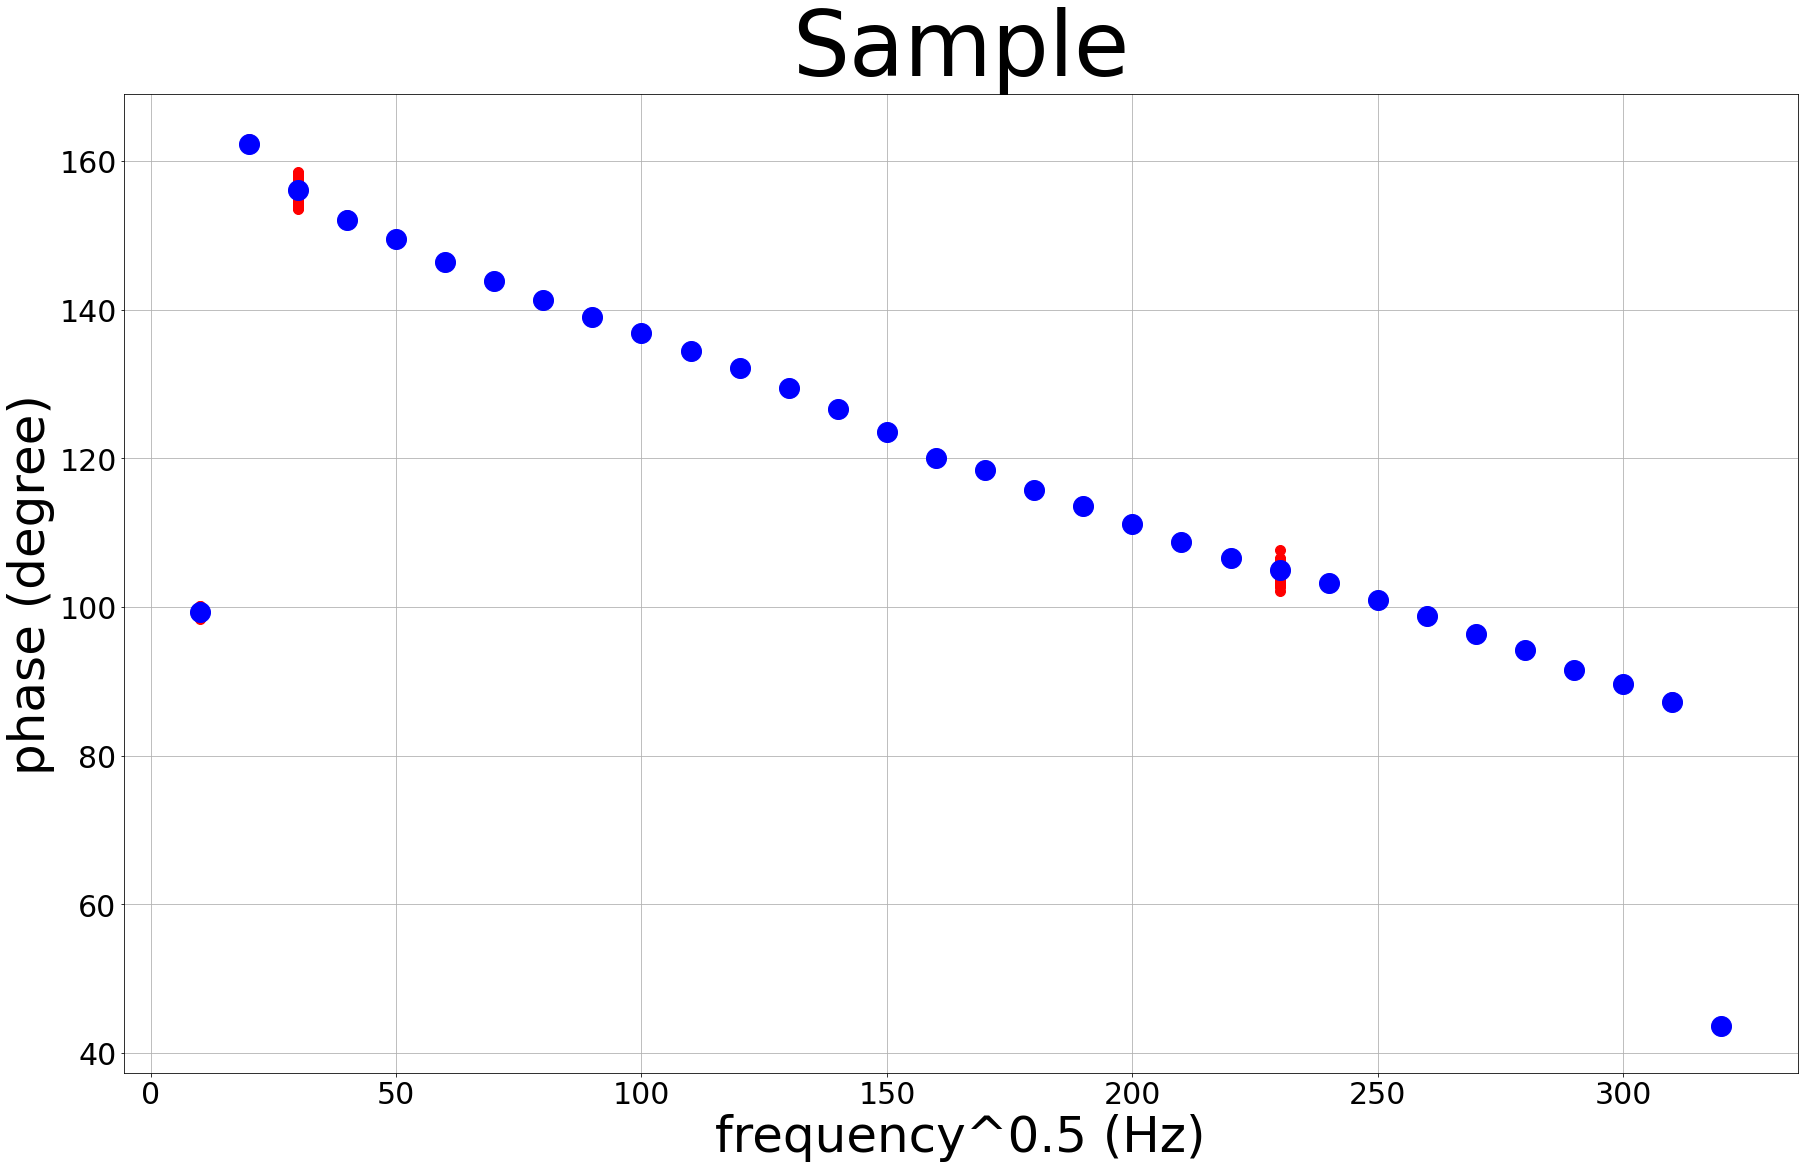

In [30]:
# 設定你那次實驗所有檔案存放的資料夾
# 這個檔案我放sample
Folder_Path = r'C:\Users\user\Documents\DATA15'    
os.chdir(Folder_Path)                                                
file_list = os.listdir()
# 理論上reference和sample的資料夾裡面檔案個數要相等
# 宣告量測sample的頻率矩陣，這邊讀取資料方式和上面一樣
sam_freq=np.zeros(file_num)
sam_sqrt_freq=np.zeros(file_num)
for i in range(1,file_num+1):
    sam_freq[i-1]=(i*10)**2
sam_sqrt_freq=sam_freq**0.5
plt.rcParams["figure.figsize"] = (30,18)
# 宣告存放sample相位和振幅的矩陣
sam_pha_aver=np.zeros(file_num)
sam_amp_aver=np.zeros(file_num)
# 跑回圈讀檔案，和讀reference方式一樣
for i in range(0,file_num):
    df = open(Folder_Path+"\\"+file_list[i], "r")
    n=len(df.readline())
    sam_pha_temp=np.zeros(n)
    sam_amp_temp=np.zeros(n)
    sam_sqrt_freq_temp=np.ones(n)*sam_sqrt_freq[i]
    j=0     
    for line in df:
        time,sam_amp_temp[j],sam_pha_temp[j]=line.split()
        j=j+1
        if(j==n):
            break
    sam_pha_aver[i]=np.mean(sam_pha_temp)
    sam_amp_aver[i]=np.mean(sam_amp_temp)
    plt.plot(sam_sqrt_freq_temp,sam_pha_temp,"ro",markersize=10)
sam_pha_aver[22]=0.5*(sam_pha_aver[21]+sam_pha_aver[23])
plt.plot(sam_sqrt_freq,sam_pha_aver,"bo",markersize=20)
plt.xlabel('frequency^0.5 (Hz)',fontsize=50)
plt.ylabel('phase (degree)',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Sample",fontsize=90)
plt.grid()
plt.show()

### 把reference和sample做修正
### 我們這裡以referene導數第二個點為基準去修改
### 由圖可以看出倒數第二個點的相位都相等

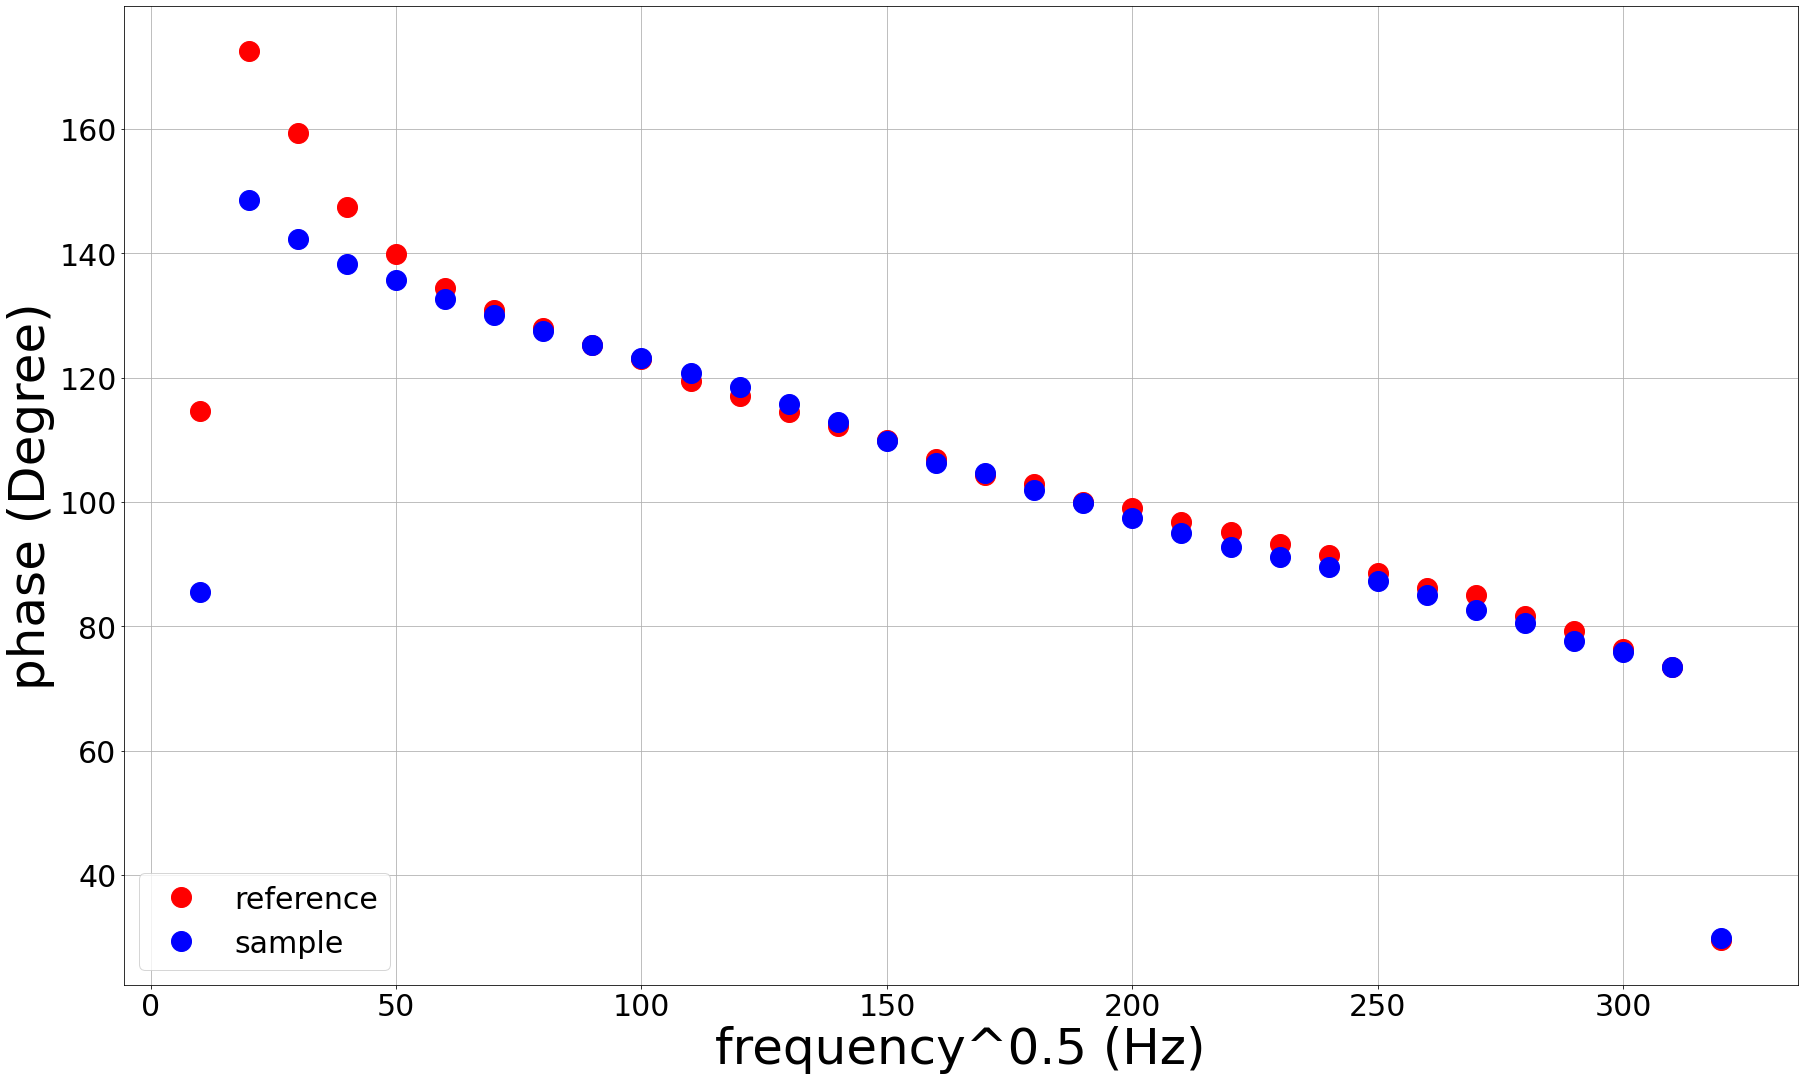

In [31]:
plt.rcParams["figure.figsize"] = (30,18)
# 將reference和sample導數第二個數據點的相位相減
# 再把這個差值dist加到sample的相位上
dist=ref_pha_aver[30]-sam_pha_aver[30]
sam_pha_aver+=dist
plt.plot(ref_sqrt_freq,ref_pha_aver,"ro",markersize=20,label="reference")
plt.plot(sam_sqrt_freq,sam_pha_aver,"bo",markersize=20,label="sample")
plt.xlabel('frequency^0.5 (Hz)',fontsize=50)
plt.ylabel('phase (Degree)',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30,loc="lower left")
plt.grid()
plt.show()

### Normalize 數據

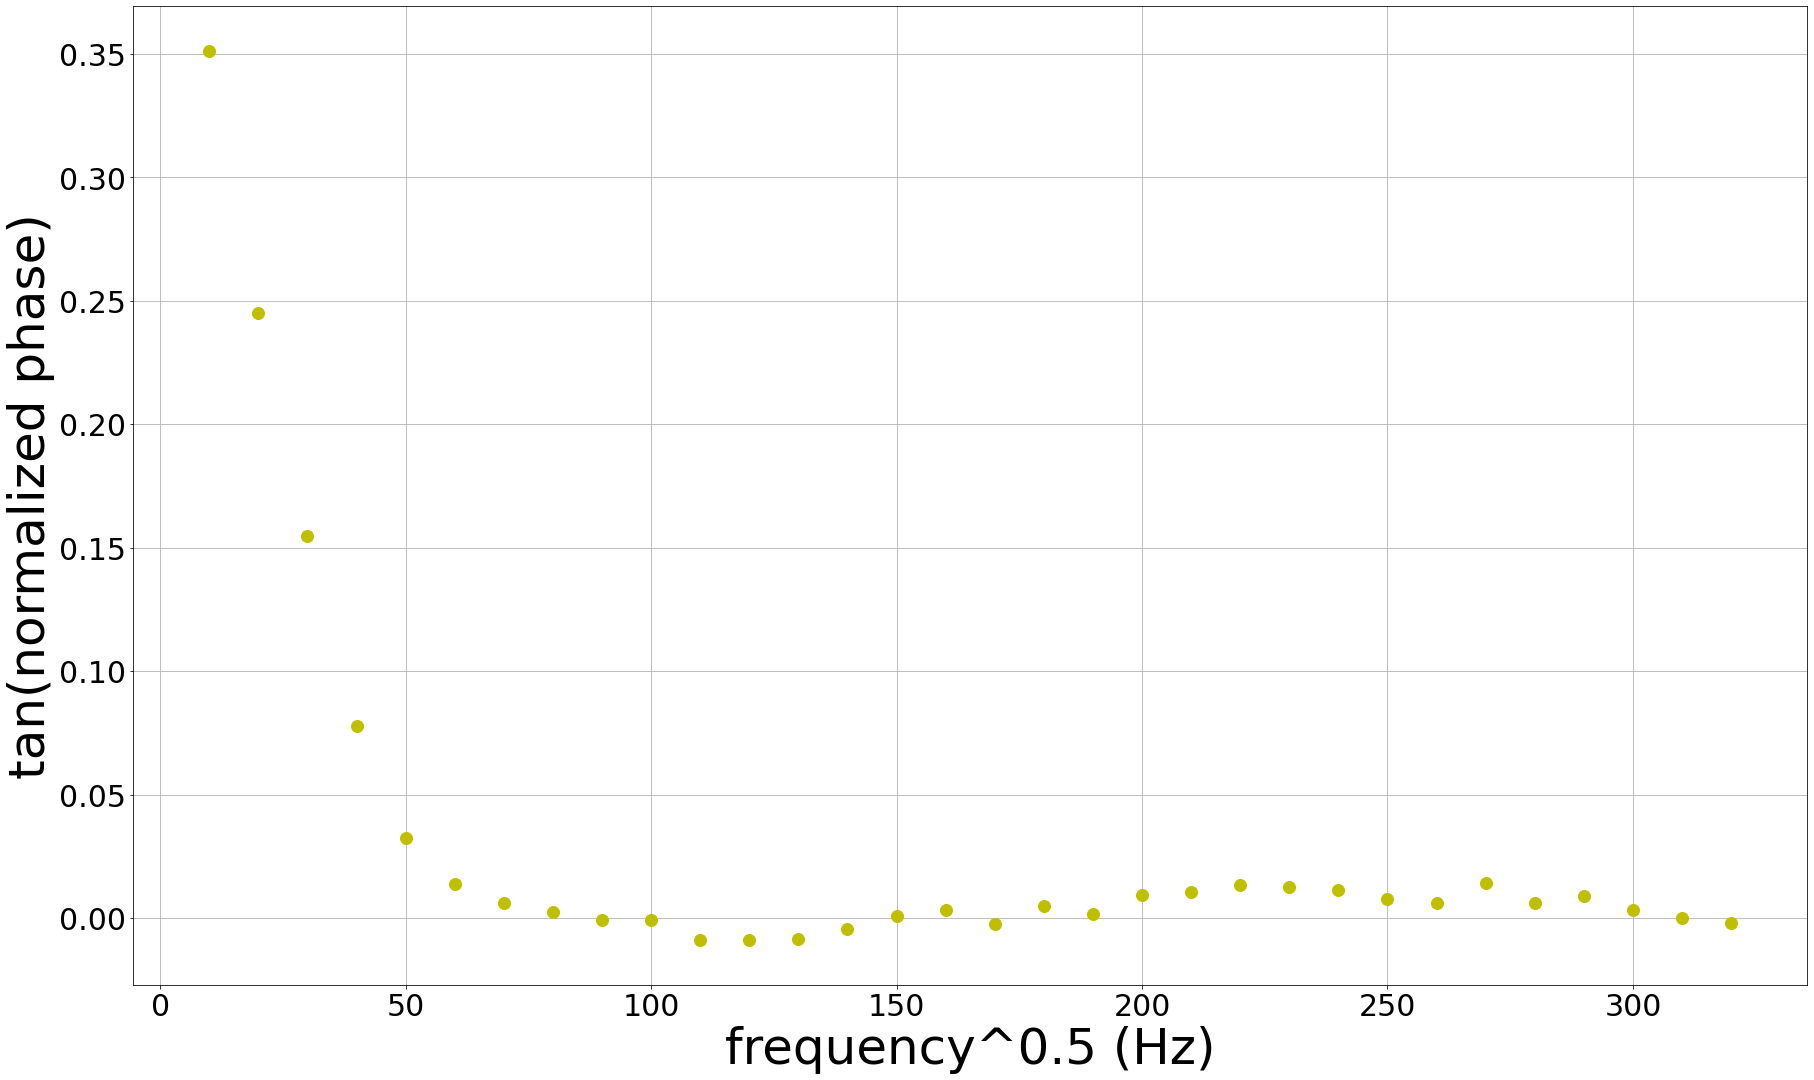

In [44]:
# q為fitting參數
q=0.2
plt.rcParams["figure.figsize"] = (30,18)
# 存放頻率(開根號)
sqrt_freq=np.zeros(len(ref_sqrt_freq))
# 存放reference相位減sample相位
phase=np.zeros(len(ref_sqrt_freq))
# 存放帶入q後normalize的tan值
normalize_tan=np.zeros(len(ref_sqrt_freq))
# 存放帶入q後normalize的相位值
normalize_phase=np.zeros(len(ref_sqrt_freq))
# 跑回圈處理每個頻率的數據
for i in range(0,len(ref_sqrt_freq)):
    sqrt_freq[i]=ref_sqrt_freq[i]
    phase[i]=(ref_pha_aver[i]-sam_pha_aver[i])*math.pi/180
    normalize_tan[i]=(((1/math.sqrt(ref_freq[i]))**q)*math.tan(phase[i]))
    normalize_phase[i]=math.atan(normalize_tan[i])
plt.plot(sqrt_freq,normalize_tan,"yo",markersize=12)
plt.xlabel('frequency^0.5 (Hz)',fontsize=50)
plt.ylabel('tan(normalized phase)',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
plt.show()

### 執行演算法，求解tau_s和R_sb
### freq_extr為斜率為0時的頻率
### tan_extr為斜率為0時freq_extr所對應的tan(相位)

In [45]:
# 設定極值的頻率和tan(相位)
# 這裡需要花時間try&error
freq_extr=100
tan_extr=max(normalize_tan)
# 這裡設定我們跑回圈前的初始tau_s值
# 也就是公式中的tau_s(0)
# 因為這裡有時候，根號裡會出現負數導致計算出問題
# 所以我會把根號裡的分子和分母輸出看看是不是負的
# 根號中的分子
tmp_tau1=1-(((tan_extr)**2)*((math.sqrt(tan_extr))**(2*q)))
print("分子：",tmp_tau1)
# 根號中的分母
tmp_tau2=1+(((tan_extr)**2)*((math.sqrt(tan_extr))**(2*q)))
print("分母：",tmp_tau2)
# tau_math=2*sqrt(pi*freq_extr*tau_s)
tau_math=math.atan(math.sqrt(tmp_tau1/tmp_tau2))
print("2*sqrt[pi*freq_extr*tau_s(0)]：",tau_math)
# 執行演算法，當下一次的tau_s減掉這一次的tau_s小於error
# 迴圈就會停止
error=1
while (error>0.00001):
    # 這裡可以對照文獻
    A=(((tan_extr)**2)*((math.sqrt(freq_extr))**(2*q)))
    B=q/tau_math
    # 新生成的tau_math為new_tau_math
    new_tau_math=math.atan((math.sqrt(1-(A**2)+(A*(B**2)))-B)/(1-(B**2)+A))
    # 計算新的和舊的的誤差差多少
    error=abs(new_tau_math-tau_math)
    # 並把new_tau_math存入tau_math
    # 作為下一個迴圈運算用的值
    tau_math=new_tau_math
# 輸出最後的tau_math值
print("the final value of tau_math:", tau_math)
# 計算R_sb
R_sb_tmp1=1-(1+q/tau_math)*math.tan(tau_math)
R_sb_tmp2=1+(1-q/tau_math)*math.tan(tau_math)
R_sb_tmp3=math.exp(tau_math)
R_sb=math.sqrt(R_sb_tmp1/R_sb_tmp2)*R_sb_tmp3
print("R_sb = ",R_sb)
tau_s=(tau_math**2)/(4*math.pi*freq_extr)
print("tau_s = ",tau_s)

分子： 0.8999826810828015
分母： 1.1000173189171985
2*sqrt[pi*freq_extr*tau_s(0)]： 0.7353057497257035
the final value of tau_math: 0.4508222351259254
R_sb =  0.7645707801419819
tau_s =  0.00016173380041147186


### 擬合曲線

In [46]:
# 設定我們擬合曲線的頻率和相對應的tan(相位)值
# 這裡取350個點
fit_freq=np.zeros(350)
fit_tan=np.zeros(350)
for i in range(0,350):
    f=i**2
    fit_freq[i]=i
    # 這裡可以參照公式
    if(i==0):
        temp2=(1-(R_sb*math.exp(-2*math.sqrt(math.pi*f*tau_s)))**2)
    else:
        temp2=(1-(R_sb*math.exp(-2*math.sqrt(math.pi*f*tau_s)))**2)*(i**q)
    temp1=2*R_sb*math.exp(-2*math.sqrt(math.pi*f*tau_s))*math.sin(2*math.sqrt(math.pi*f*tau_s))
    fit_tan[i]=temp1/temp2

### 畫出最後輸出結果

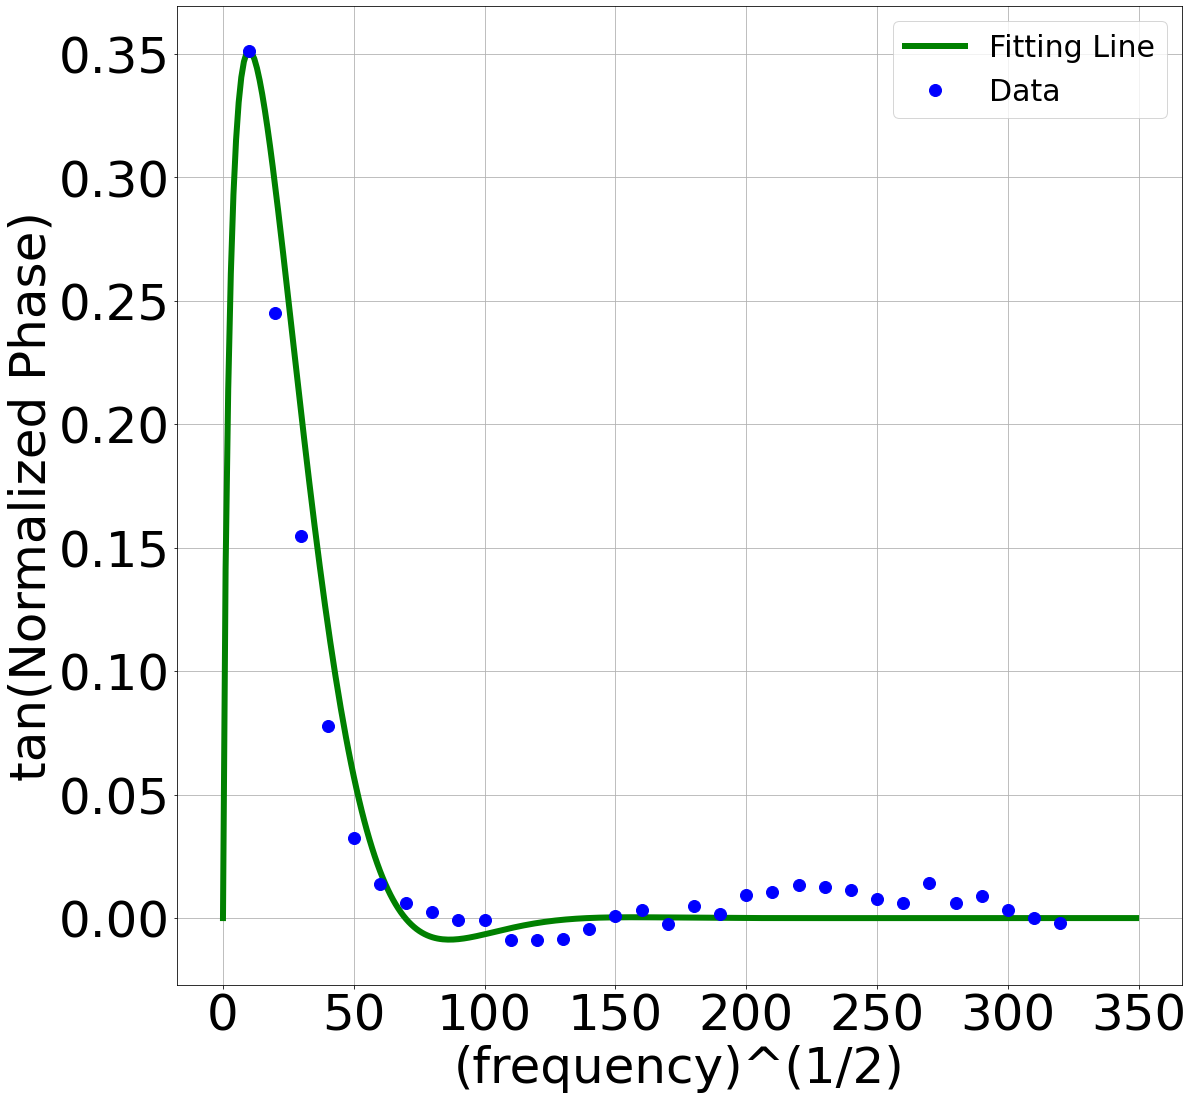

In [47]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(fit_freq,fit_tan,"g-",linewidth=6,label="Fitting Line")
plt.plot(sqrt_freq,normalize_tan,"bo",markersize=12,label="Data")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(fontsize=30,loc="upper right")
plt.xlabel('(frequency)^(1/2)',fontsize=50)
plt.ylabel('tan(Normalized Phase)',fontsize=50)
plt.grid()
plt.show()

### 計算材料熱性質參數
### 可參考：https://thermtest.com/thermal-resources/heat-penetration-calculator#|timeinput_1|thickinput_5

In [50]:
# e_s: coating thermal effusivity 未知
# e_b: substrate thermal effusivity 已知
# tau_s: thermal diffusion time 未知
# d_s: coating thickness 已知
# a_s: coating thermal diffusivity
#R_sb=-(1-(e_s/e_b))/(1+(e_s/e_b))
#tau_s=(d_s**2)/a_s

d_s=90*10**-6
e_b=14338
a_s=(d_s**2)/tau_s
e_s=-(R_sb-1)/(R_sb+1)*e_b
print("Coating Thermal Diffusivity = ", a_s*10**6, " mm^2/s")
print("Coating Thermal Effusivity = ",e_s," (Ws^0.5)/(Km^2)")
print("Coating Thermal Conductivity = ",math.sqrt(a_s*(e_s**2))," W/mK")

Coating Thermal Diffusivity =  50.08229559555605  mm^2/s
Coating Thermal Effusivity =  1912.9774743593202  (Ws^0.5)/(Km^2)
Coating Thermal Conductivity =  13.537920822201382  W/mK
